# <center> <u> Put Call Parity </u> </center> 

In [1]:
import numpy as np
import pandas as pd 
import yfinance as yf
from datetime import datetime

from numba import jit, prange

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

## <center> Set Seaborn Theme </center>

In [2]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (10, 5))

## <center> Fetch Data from Yahoo Finance </center> 

In [3]:
SPX = yf.Ticker("^SPX")

In [4]:
SPX.history(period = "1d")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-06 00:00:00-04:00,4234.790039,4324.100098,4219.549805,4308.5,3902030000,0.0,0.0


In [5]:
last_close = SPX.history(period = "1d")["Close"]

In [6]:
expirations = SPX.options
chain = expirations[5]
chain

'2023-10-16'

In [7]:
opt = SPX.option_chain(date = chain)
calls = opt.calls
puts = opt.puts

In [8]:
def get_dte(oc):
    """
    
    """
    today = datetime.today()
    expiry = datetime.strptime(oc, '%Y-%m-%d')
    dte =  (expiry - today).days
    
    return dte

In [9]:
dte = []
for e in expirations:
    dte.append(get_dte(e))

## <center> Call DataFrame </center> 

In [10]:
calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW231016C01200000,2023-09-21 14:11:14+00:00,1200.0,3162.80,3073.8,3078.9,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
1,SPXW231016C01600000,2023-09-21 14:11:14+00:00,1600.0,2764.40,2674.2,2679.4,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
2,SPXW231016C03750000,2023-09-27 15:22:45+00:00,3750.0,532.52,527.1,532.4,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
3,SPXW231016C03800000,2023-09-11 14:30:10+00:00,3800.0,697.04,479.5,482.6,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
4,SPXW231016C03900000,2023-09-21 14:08:59+00:00,3900.0,475.80,377.8,383.1,0.0,0.0,62.0,0,0.00001,True,REGULAR,USD


In [11]:
calls.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
107,SPXW231016C04650000,2023-10-06 16:27:57+00:00,4650.0,0.07,0.0,0.10,-0.08,-53.333336,1.0,0,0.185311,False,REGULAR,USD
108,SPXW231016C04700000,2023-10-04 14:41:13+00:00,4700.0,0.05,0.0,0.10,0.00,0.000000,41.0,0,0.208504,False,REGULAR,USD
109,SPXW231016C04800000,2023-10-04 07:40:35+00:00,4800.0,0.07,0.0,0.10,0.00,0.000000,1.0,0,0.253425,False,REGULAR,USD
110,SPXW231016C04900000,2023-10-02 14:30:57+00:00,4900.0,0.05,0.0,0.05,0.00,0.000000,1.0,0,0.280281,False,REGULAR,USD
111,SPXW231016C05000000,2023-09-14 14:01:58+00:00,5000.0,0.11,0.0,0.05,0.00,0.000000,NaN,0,0.319343,False,REGULAR,USD


## <center> Put DataFrame </center> 

In [12]:
puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW231016P02000000,2023-09-28 14:00:08+00:00,2000.0,0.05,0.0,0.1,0.0,0.0,NaN,0,1.511721,False,REGULAR,USD
1,SPXW231016P02400000,2023-10-05 15:33:09+00:00,2400.0,0.05,0.0,0.1,0.0,0.0,5.0,0,1.166020,False,REGULAR,USD
2,SPXW231016P02600000,2023-10-05 15:34:13+00:00,2600.0,0.05,0.0,0.1,0.0,0.0,34.0,0,1.015630,False,REGULAR,USD
3,SPXW231016P02800000,2023-10-06 13:38:09+00:00,2800.0,0.05,0.0,0.1,0.0,0.0,3.0,0,0.873048,False,REGULAR,USD
4,SPXW231016P03000000,2023-10-09 01:23:32+00:00,3000.0,0.10,0.0,0.1,0.0,0.0,3.0,0,0.740237,False,REGULAR,USD


In [13]:
puts.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
137,SPXW231016P04575000,2023-10-06 18:28:56+00:00,4575.0,253.90,286.4,298.4,115.479996,83.42725,1.0,0,0.462797,True,REGULAR,USD
138,SPXW231016P04600000,2023-09-21 19:51:04+00:00,4600.0,253.30,318.1,320.9,0.000000,0.00000,3.0,0,0.473363,True,REGULAR,USD
139,SPXW231016P04625000,2023-09-28 14:09:10+00:00,4625.0,330.54,337.1,345.6,0.000000,0.00000,10.0,0,0.495763,True,REGULAR,USD
140,SPXW231016P04700000,2023-10-03 14:10:43+00:00,4700.0,439.30,418.0,420.8,0.000000,0.00000,10.0,0,0.557637,True,REGULAR,USD
141,SPXW231016P04900000,2023-09-08 15:43:04+00:00,4900.0,409.59,580.4,587.6,0.000000,0.00000,2.0,2,0.000010,True,REGULAR,USD


## <center> Join DataFrame by Strike </center> 

In [14]:
join_df = pd.merge(left = calls, right = puts, how = "inner", left_on = ["strike"], right_on = ["strike"])

In [15]:
join_df.head()

,contractSymbol_x,lastTradeDate_x,strike,lastPrice_x,bid_x,ask_x,change_x,percentChange_x,volume_x,openInterest_x,...,bid_y,ask_y,change_y,percentChange_y,volume_y,openInterest_y,impliedVolatility_y,inTheMoney_y,contractSize_y,currency_y
0,SPXW231016C03750000,2023-09-27 15:22:45+00:00,3750.0,532.52,527.1,532.4,0.0,0.0,NaN,0,...,0.00,0.00,-0.50,-45.454544,188.0,0,0.125009,False,REGULAR,USD
1,SPXW231016C03800000,2023-09-11 14:30:10+00:00,3800.0,697.04,479.5,482.6,0.0,0.0,NaN,0,...,0.85,1.00,-0.55,-47.826084,107.0,0,0.379279,False,REGULAR,USD
2,SPXW231016C03900000,2023-09-21 14:08:59+00:00,3900.0,475.80,377.8,383.1,0.0,0.0,62.0,0,...,1.15,1.50,-1.15,-58.974360,219.0,0,0.328986,False,REGULAR,USD
3,SPXW231016C03950000,2023-09-27 15:22:45+00:00,3950.0,336.62,328.2,333.5,0.0,0.0,NaN,0,...,1.45,1.80,-1.45,-59.183674,16.0,0,0.301399,False,REGULAR,USD
4,SPXW231016C03975000,2023-10-03 19:25:01+00:00,3975.0,261.10,303.4,311.4,261.1,NaN,NaN,0,...,1.60,1.95,-2.58,-72.676056,42.0,0,0.286689,False,REGULAR,USD


In [16]:
join_df.tail()

,contractSymbol_x,lastTradeDate_x,strike,lastPrice_x,bid_x,ask_x,change_x,percentChange_x,volume_x,openInterest_x,...,bid_y,ask_y,change_y,percentChange_y,volume_y,openInterest_y,impliedVolatility_y,inTheMoney_y,contractSize_y,currency_y
97,SPXW231016C04575000,2023-10-03 13:57:00+00:00,4575.0,0.15,0.0,0.20,0.0,0.0,4.0,0,...,286.4,298.4,115.479996,83.42725,1.0,0,0.462797,True,REGULAR,USD
98,SPXW231016C04600000,2023-10-06 19:27:26+00:00,4600.0,0.10,0.0,0.15,0.0,0.0,19.0,0,...,318.1,320.9,0.000000,0.00000,3.0,0,0.473363,True,REGULAR,USD
99,SPXW231016C04625000,2023-09-29 13:43:54+00:00,4625.0,0.20,0.0,0.00,0.0,0.0,24.0,0,...,337.1,345.6,0.000000,0.00000,10.0,0,0.495763,True,REGULAR,USD
100,SPXW231016C04700000,2023-10-04 14:41:13+00:00,4700.0,0.05,0.0,0.10,0.0,0.0,41.0,0,...,418.0,420.8,0.000000,0.00000,10.0,0,0.557637,True,REGULAR,USD
101,SPXW231016C04900000,2023-10-02 14:30:57+00:00,4900.0,0.05,0.0,0.05,0.0,0.0,1.0,0,...,580.4,587.6,0.000000,0.00000,2.0,2,0.000010,True,REGULAR,USD


## <center> Filter with List Comprehension </center> 

In [17]:
df = join_df[(3500 < join_df["strike"]) & (join_df["strike"] < 5500)]

## <center> Volatility Curve </center> 

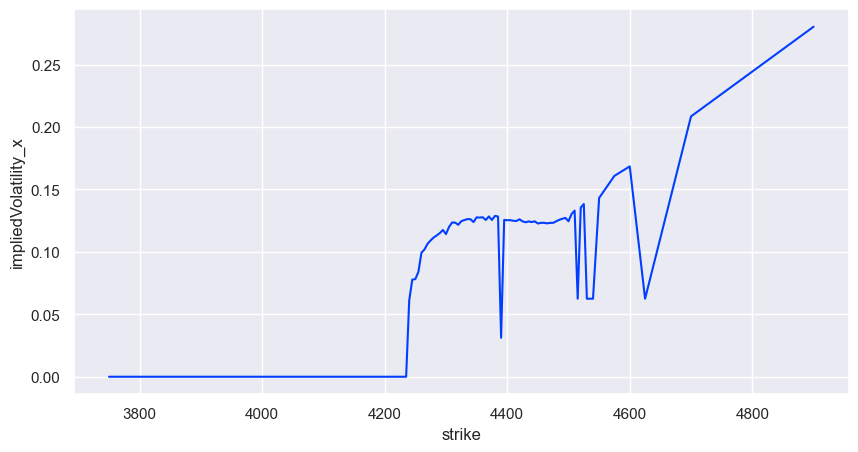

In [18]:
ax = sns.lineplot(
    x = df["strike"],
    y = df["impliedVolatility_x"],
)

plt.show()

## <center> Option Prices </center> 

In [19]:
call_mid = ((df["bid_x"] + df["ask_x"]) / 2)
put_mid = ((df["bid_y"] + df["ask_y"]) / 2)

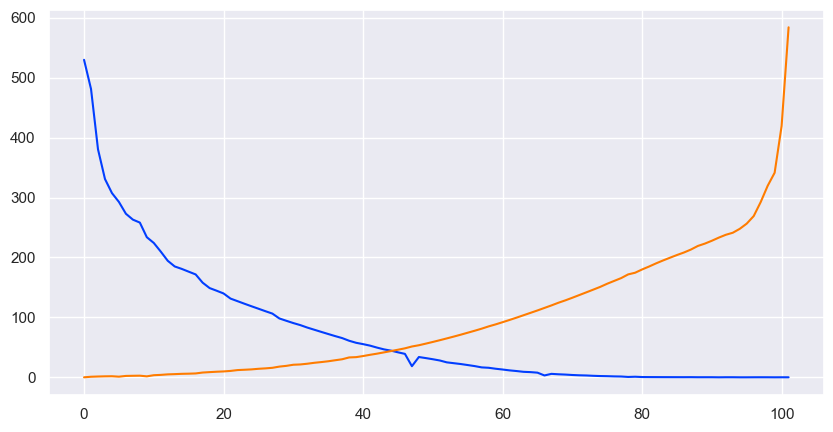

In [20]:
ax = sns.lineplot(call_mid)

sns.lineplot(put_mid)

plt.show()

## <center> Put Call Parity </center> 

## <center> $ C(t) - P(t) = S(t) - Ke^{-rT} $ </center> 

In [21]:
parity_spread = ((df["bid_x"] + df["ask_x"]) / 2) - ((df["bid_y"] + df["ask_y"]) / 2)

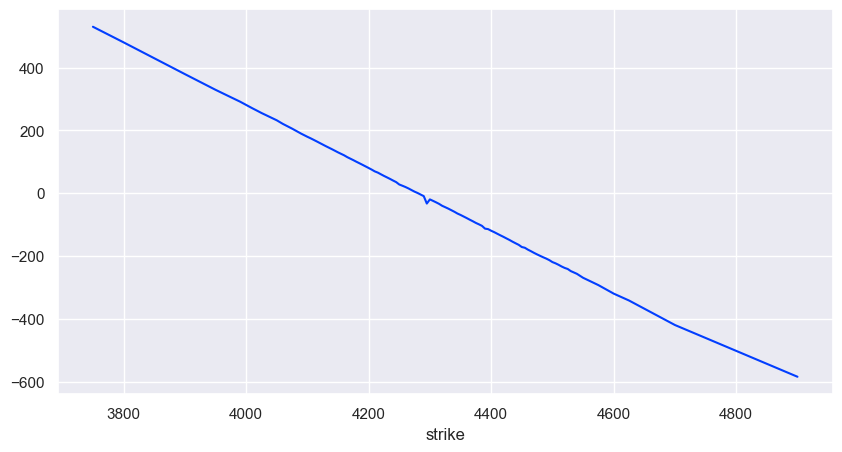

In [22]:
ax = sns.lineplot(
    x = df["strike"],
    y = parity_spread,
)

plt.show()

## <center> $ y_{i} = \alpha + X \beta $ </center>

In [23]:
X = df["strike"].to_numpy().reshape(-1, 1)
y = parity_spread

model = LinearRegression().fit(X, y)

In [24]:
model.score(X, y)

0.9996008085692771

In [25]:
alpha = model.intercept_
alpha

4245.8400786365755

In [26]:
beta = -model.coef_[0]
beta

0.9918619560245424

In [27]:
@jit(nopython = True)
def f(x):
    
    return np.exp(-x)

In [28]:
def bisection_method(root):
    """
    
    """
    
    a = 0
    b = 1
    c = (a + b) / 2
    fc = f(c)
    
    err_tol = 1e-7
    itr = 0
    max_itr = 100
    
    while np.abs(fc - root) > err_tol and itr < max_itr:
        
        if fc > root:
            a = c
            c = (a + b) / 2
            
        if fc < root:
            b = c
            c = (a + b) / 2
            
        fc = f(c)
        itr += 1
    
    return c

In [29]:
interest_rate = bisection_method(beta)
interest_rate * (365 / get_dte(expirations[5])) * 100

42.60759694235666

In [30]:
def get_box_spread_rates():
    """
    
    """
    ticker = yf.Ticker("^SPX")
    expirations = ticker.options

    risk_free_yields = {}
    
    for i, expiry in enumerate(expirations): 
        dte = get_dte(expiry)
        
        if (1 < dte < 365):
            tmp_data = {}
            opt = ticker.option_chain(date = expiry)

            join_df = pd.merge(left = opt.calls, right = opt.puts, how = "inner", left_on = ["strike"], right_on = ["strike"])
            df = join_df[(3500 < join_df["strike"]) & (join_df["strike"] < 5500)]

            if len(df) > 20:
                call_mid = ((df["bid_x"] + df["ask_x"]) / 2)
                put_mid = ((df["bid_y"] + df["ask_y"]) / 2)

                parity_spread = ((df["bid_x"] + df["ask_x"]) / 2) - ((df["bid_y"] + df["ask_y"]) / 2)

                X = df["strike"].to_numpy().reshape(-1, 1)
                y = parity_spread
                model = LinearRegression().fit(X, y)

                alpha = model.intercept_
                beta = np.abs(model.coef_[0])
                interest_rate = bisection_method(beta) * (365 / dte) * 100
                
                tmp_data["Score"] = model.score(X, y)
                tmp_data["Interest Rate"] = interest_rate
                risk_free_yields[expiry] = tmp_data
        
    return risk_free_yields

In [31]:
yields = get_box_spread_rates()

In [32]:
yields_df = pd.DataFrame.from_dict(yields).T
display(yields_df)

,Score,Interest Rate
2023-10-11,0.997037,1.161972e+02
2023-10-12,0.999688,3.636682e+01
2023-10-13,0.989103,8.776900e+01
2023-10-16,0.999601,4.260760e+01
2023-10-17,0.999971,9.701952e+00
2023-10-18,0.990570,7.253736e+01
2023-10-19,0.990916,4.193715e+01
2023-10-20,0.714604,1.039230e+03
2023-10-23,0.999642,1.028337e-27
2023-10-24,0.999564,9.597808e-28


In [33]:
filtered_yield_df = yields_df[yields_df["Score"] >= 0.99999]
display(filtered_yield_df)

,Score,Interest Rate
2024-09-30,0.999997,5.517452


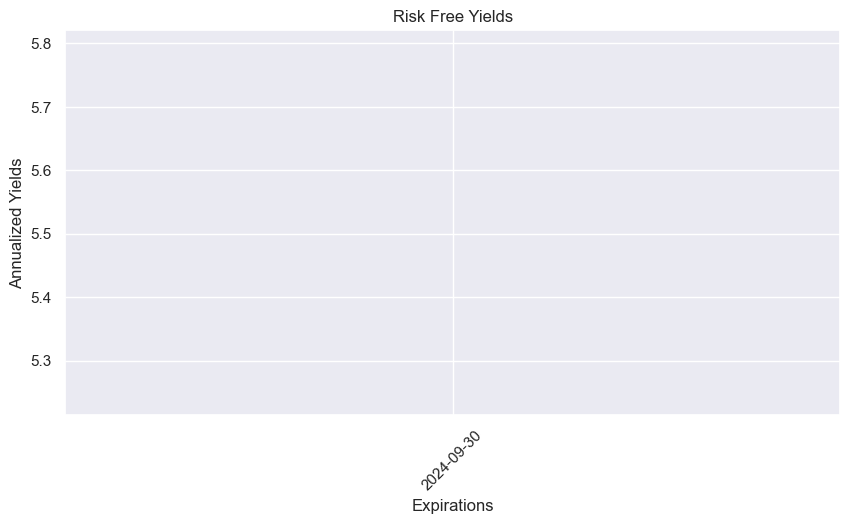

In [34]:
ax = sns.lineplot(
    filtered_yield_df["Interest Rate"],
)

ax.set(
    title = "Risk Free Yields",
    xlabel = "Expirations",
    ylabel = "Annualized Yields",
)

plt.xticks(rotation = 45)
plt.show()